In [8]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
# Simulated historical price data
np.random.seed(1234)
n = 1000000
dt = 1 / n
mu = 2.0
theta = 0.2
sigma = 0.5
# Simulating the Ornstein-Uhlenbeck process
X = np.zeros(n)
X[0] = mu
for t in range(1, n):
 X[t] = X[t-1] + theta * (mu - X[t-1]) * dt + sigma * np.sqrt(dt) *np.random.normal()
# Function to estimate parameters using MLE
def ou_log_likelihood(params, X):
 mu, theta, sigma = params
 X_diff = np.diff(X)
 X_mean = (X[:-1] + X[1:]) / 2
 ll = -np.sum(-0.5 * np.log(2 * np.pi * sigma**2 * dt) - (X_diff -theta * (mu - X_mean) * dt)**2 / (2 * sigma**2 * dt))
 return -ll
# Initial guess for parameters
initial_params = [np.mean(X), 0.1, np.std(X)]
# Optimizing the log-likelihood function
result = minimize(ou_log_likelihood, initial_params, args=(X,))
mu_est, theta_est, sigma_est = result.x
print(f"Estimated Mean (mu): {mu_est}")
print(f"Estimated Speed of Mean Reversion (theta): {theta_est}")
print(f"Estimated Volatility (sigma): {sigma_est}")

Estimated Mean (mu): 1.8471469100082551
Estimated Speed of Mean Reversion (theta): 0.1
Estimated Volatility (sigma): 0.127604285692174


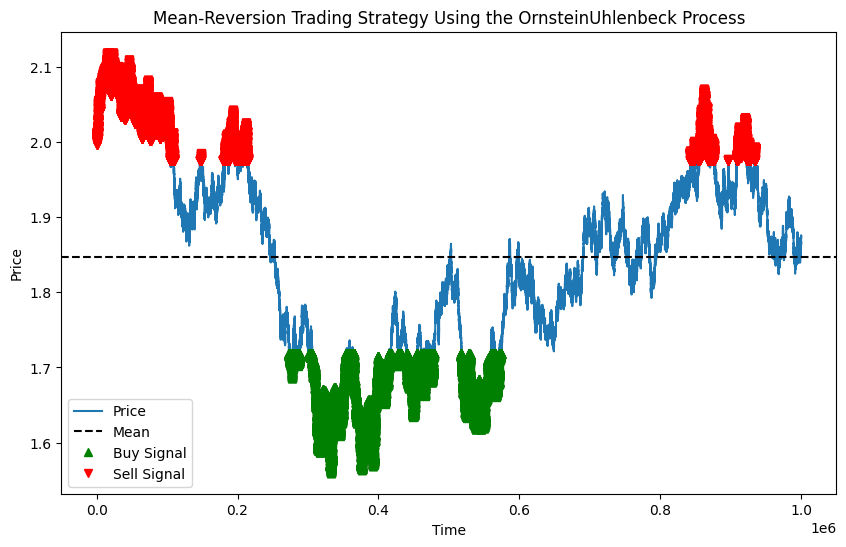

In [9]:
import numpy as np
import matplotlib.pyplot as plt
# Calculate the long-term mean
mean_price = mu_est
# Generate buy and sell signals
threshold = 1 * sigma_est
buy_signals = X < (mean_price - threshold)
sell_signals = X > (mean_price + threshold)
# Plotting the signals
plt.figure(figsize=(10, 6))
plt.plot(X, label='Price')
plt.axhline(mean_price, color='k', linestyle='--', label='Mean')
plt.plot(np.where(buy_signals)[0], X[buy_signals], '^', color='g',
label='Buy Signal')
plt.plot(np.where(sell_signals)[0], X[sell_signals], 'v', color='r',
label='Sell Signal')
plt.title('Mean-Reversion Trading Strategy Using the OrnsteinUhlenbeck Process')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

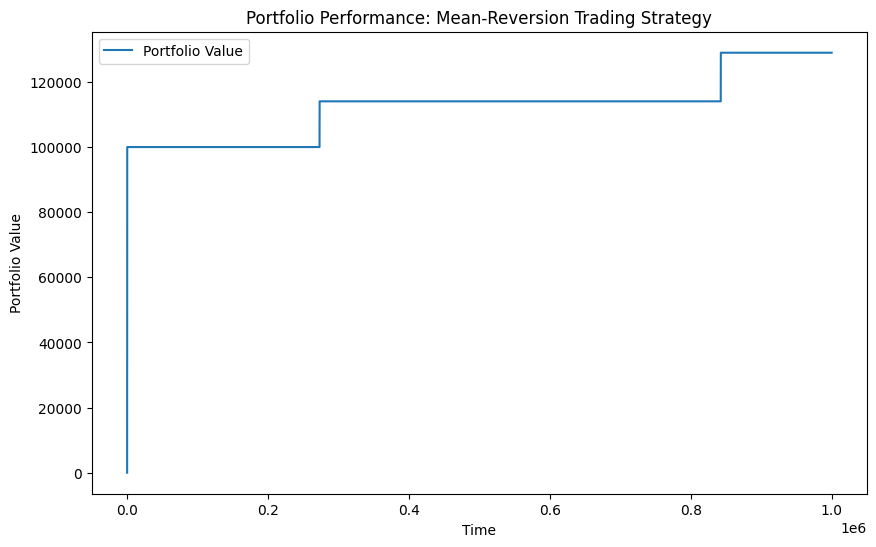

In [10]:
# Define initial capital
initial_capital = 100000

# Track position (1: long, -1: short, 0: no position)
position = 0

# Initialize portfolio value array with size n
portfolio_value = np.zeros(n)

# Starting cash balance
cash = initial_capital

# Loop through each day (starting from day 1)
for day in range(1, n):
  # Check for entry signals
  if position == 0:
    if buy_signals[day]:  # Buy signal detected
      position = 1
      entry_price = X[day]  # Record entry price
    elif sell_signals[day]:  # Sell signal detected (considered short entry)
      position = -1
      entry_price = X[day]  # Record entry price for short position

  # Check for exit signals based on current position
  elif position == 1:
    if sell_signals[day]:  # Exit long position
      position = 0
      cash += (X[day] - entry_price) * initial_capital / entry_price
  elif position == -1:
    if buy_signals[day]:  # Exit short position
      position = 0
      cash += (entry_price - X[day]) * initial_capital / entry_price

  # Update portfolio value based on current cash balance
  portfolio_value[day] = cash

# Plot the portfolio performance
plt.figure(figsize=(10, 6))
plt.plot(portfolio_value, label='Portfolio Value')
plt.title('Portfolio Performance: Mean-Reversion Trading Strategy')
plt.xlabel('Time')
plt.ylabel('Portfolio Value')
plt.legend()
plt.show()